<a href="https://colab.research.google.com/github/gmrdns03/DataAnalysis_Python_Minkyo/blob/main/%5B%EB%AA%A8%EB%91%90%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%5D%20%EC%9D%B8%EA%B5%AC%EA%B5%AC%EC%A1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%B0%8F%20%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0/unit15_%ED%8C%90%EB%8B%A4%EC%8A%A4%EB%A1%9C_%EC%9D%B8%EA%B5%AC%EA%B5%AC%EC%A1%B0_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


# 문제정의

전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어디일까?

In [ ]:
import pandas as pd

df = pd.read_csv('/content/age2019_02_noComa_cgName.csv', encoding='cp949', index_col=0)
df.head()

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 2019년02월_계_100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


## 인구수 -> 인구비율로 데이터 전처리

In [ ]:
df = df.div(df['총인구수'], axis=0) # 전체 데이터를 총 인구수로 나눠서 비율로 전환
df.head()

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),1.0,1.0,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008

In [ ]:
del df['총인구수'], df['연령구간인구수']  # 총인구수, 연령구간인구수 열삭제
df.head()

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,0.016590,0.013982,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.

## 2~3. 궁금한 지역 이름 받고 해당 지역의 인구 구조 저장하기


In [ ]:
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')  # 지역 이름 입력받기
a = df.index.str.contains(name) # 3 해당 행의 인덱스를 찾아서 인구구조를 저장

df2 = df[a] # 인구 구조 저장
df2.head()

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  신도림동


,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,0.01127,0.010277,0.009499,0.009579,0.009123,0.009069,0.009365,0.009096,0.010921,0.010196,0.010465,0.012155,0.011377,0.013846,0.012102,0.012504,0.012021,0.012987,0.012638,0.012772,0.014973,0.014516,0.015536,0.016609,0.017119,0.019856,0.020285,0.021251,0.01999,0.021171,...,0.012236,0.011431,0.013336,0.01017,0.010304,0.010706,0.007486,0.007755,0.007406,0.007191,0.007272,0.005984,0.004562,0.004025,0.004132,0.004749,0.003757,0.003381,0.003059,0.003247,0.002603,0.002308,0.002147,0.001583,0.001288,0.001181,0.001154,0.000751,0.000778,0.00059,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.00008,0.000188


## 궁금한 지역 인구구조 시각화

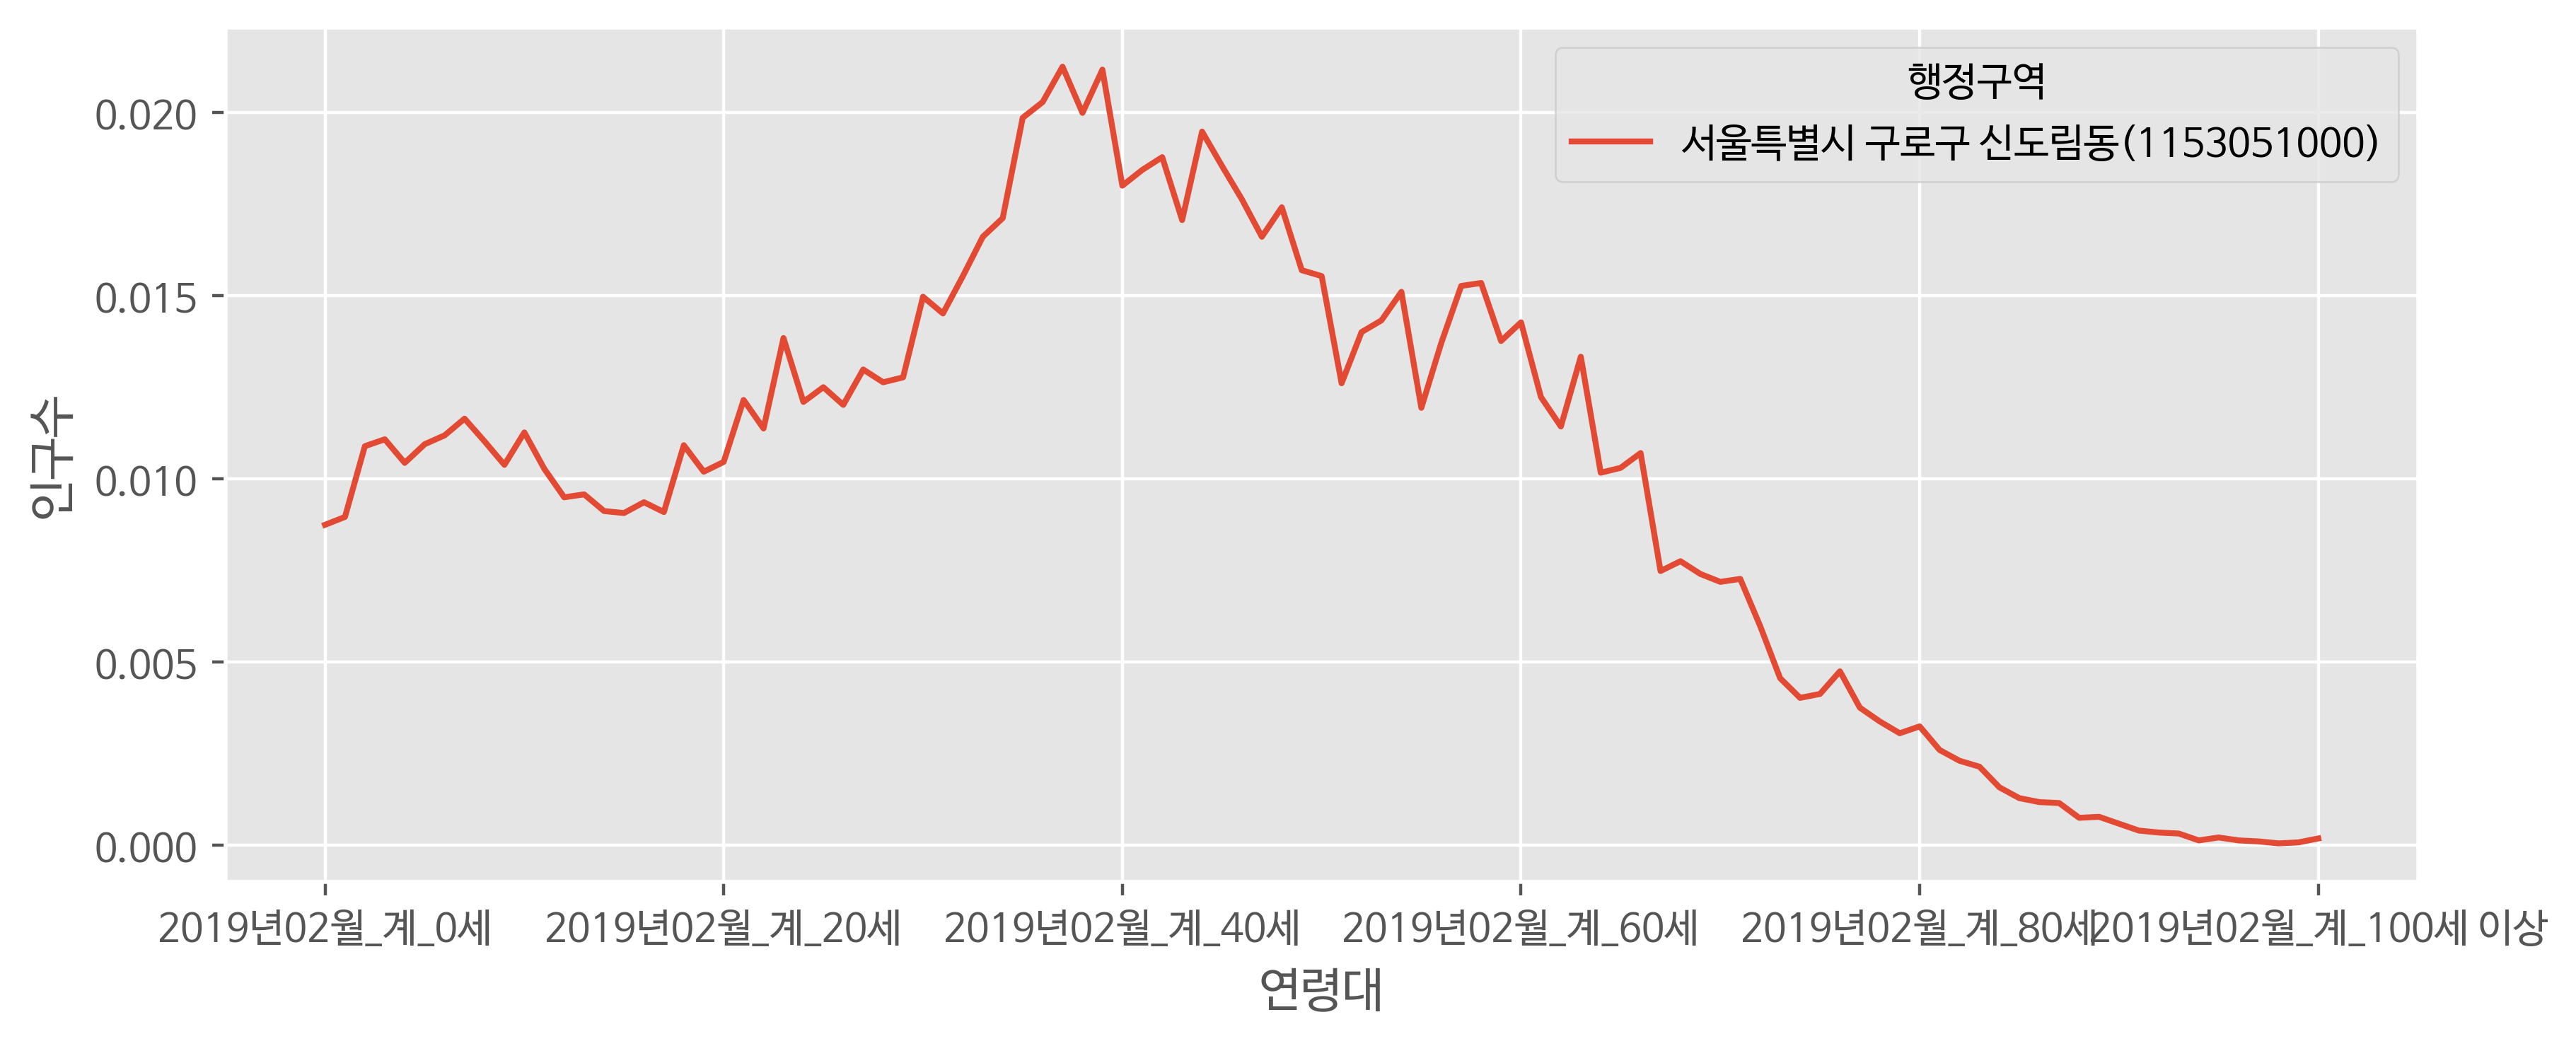

In [ ]:
import matplotlib.pyplot as plt

# 데이터 시각화하기
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
# plt.figure(figsize=(10,4), dpi = 200)
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 200

df2.T.plot()  # T가 행렬을 세로벡터형태로 바꿔서 만들고 그래프 그리기
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.show()

In [ ]:
df.sub(df2.iloc[0], axis=1) # home - away

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.003248,-0.002862,-0.004158,-0.003843,-0.003270,-0.003886,-0.003372,-0.004098,-0.003287,-0.003201,-0.003674,-0.002061,-0.001846,-0.002258,-0.001106,-0.000620,-0.000964,0.000158,0.000056,0.001016,0.001235,0.000380,0.001877,0.000654,0.003315,0.003489,0.004934,0.003979,0.002998,0.002683,0.000398,0.000273,-0.000767,-0.001742,-0.002520,-0.003724,-0.003405,-0.004041,-0.003324,-0.004589,...,0.002386,0.002115,0.000543,0.002507,0.000273,0.000573,0.001015,0.001009,0.001614,0.001609,0.001531,0.002159,0.001646,0.002466,0.001947,0.002624,0.002484,0.001692,0.001796,0.001097,0.001214,0.001096,0.000894,0.001001,0.000810,0.000636,0.000331,0.000487,0.000320,0.000323,0.000334,0.000201,0.000085,0.000165,0.000073,0.000097,0.000053,0.000067,0.000010,0.000419
서울특별시 종로구 (1111000000),-0.004869,-0.004495,-0.005825,-0.005365,-0.004865,-0.005303,-0.004498,-0.005732,-0.004409,-0.004347,-0.004702,-0.002748,-0.002408,-0.003005,-0.001934,-0.001351,-0.001705,-0.000344,-0.000926,0.001362,0.001957,0.001725,0.002968,0.002206,0.003846,0.004320,0.005522,0.004007,0.003361,0.001840,-0.000543,-0.000381,-0.002061,-0.003861,-0.004770,-0.005799,-0.006445,-0.006737,-0.005580,-0.006931,...,0.002593,0.002986,0.000956,0.003004,0.000587,0.001042,0.001423,0.001318,0.002105,0.002176,0.002618,0.002971,0.002627,0.003923,0.003351,0.004565,0.004387,0.003448,0.003907,0.002601,0.002388,0.002435,0.001948,0.002158,0.001734,0.001403,0.001044,0.001093,0.000766,0.000711,0.000664,0.000515,0.000411,0.000383,0.000237,0.000396,0.000239,0.000208,0.000175,0.001356
서울특별시 종로구 청운효자동(1111051500),-0.003674,-0.002890,-0.005360,-0.003549,-0.002905,-0.003723,-0.002888,-0.003267,-0.002189,-0.003082,-0.001662,0.000638,0.000494,-0.001509,0.001330,0.000462,0.000935,0.002510,0.000993,0.001103,0.002756,-0.001164,0.002535,0.000605,-0.001417,0.000025,0.001123,0.001310,-0.001032,-0.002242,-0.002059,-0.002449,-0.002316,-0.004311,-0.004667,-0.005021,-0.006604,-0.003419,-0.001927,-0.003800,...,-0.000706,-0.000823,-0.001038,-0.000100,-0.000158,-0.001175,-0.000492,0.000162,0.001434,0.000956,0.001875,0.003086,0.002741,0.003892,0.002939,0.004859,0.003469,0.003306,0.004858,0.003133,0.002317,0.002842,0.002619,0.002029,0.002325,0.001202,0.001152,0.000171,0.000836,0.000486,0.000289,0.000266,0.000754,0.000327,0.000323,0.000558,0.000200,0.000100,0.000073,0.001042
서울특별시 종로구 사직동(1111053000),-0.004261,-0.003745,-0.004216,-0.004091,-0.003447,-0.003644,-0.001381,-0.004863,-0.002472,-0.003706,-0.002088,-0.002660,-0.000317,-0.002275,-0.002445,-0.001244,-0.001330,-0.002001,-0.002469,-0.000180,-0.000552,-0.000678,-0.001673,-0.003099,0.001150,0.000017,0.003734,0.001516,0.001656,0.000375,-0.001721,0.003117,0.000115,-0.003671,-0.004598,-0.005457,-0.00494

In [ ]:
df2.iloc[0]

2019년02월_계_0세         0.008747
2019년02월_계_1세         0.008962
2019년02월_계_2세         0.010894
2019년02월_계_3세         0.011082
2019년02월_계_4세         0.010438
                        ...   
2019년02월_계_96세        0.000134
2019년02월_계_97세        0.000107
2019년02월_계_98세        0.000054
2019년02월_계_99세        0.000080
2019년02월_계_100세 이상    0.000188
Name: 서울특별시 구로구 신도림동(1153051000), Length: 101, dtype: float64

In [ ]:
df.loc[df.sub(df2.iloc[0], axis=1).sum(axis =1).sort_values().index[:5]]

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전라남도 신안군 압해읍고이도출장소(4691025500),0.000000,0.000000,0.008772,0.004386,0.008772,0.000000,0.000000,0.004386,0.004386,0.000000,0.000000,0.004386,0.000000,0.004386,0.000000,0.004386,0.000000,0.004386,0.004386,0.000000,0.004386,0.004386,0.004386,0.004386,0.004386,0.013158,0.008772,0.004386,0.000000,0.000000,0.004386,0.008772,0.008772,0.013158,0.008772,0.008772,0.008772,0.004386,0.004386,0.013158,...,0.021930,0.013158,0.021930,0.008772,0.026316,0.026316,0.026316,0.021930,0.035088,0.021930,0.021930,0.035088,0.021930,0.017544,0.017544,0.035088,0.039474,0.026316,0.021930,0.017544,0.008772,0.017544,0.004386,0.008772,0.013158,0.004386,0.008772,0.013158,0.004386,0.000000,0.004386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
경상남도 진주시 대평면(4817045000),0.001712,0.001712,0.003425,0.001712,0.002568,0.005137,0.004281,0.002568,0.000000,0.005993,0.004281,0.004281,0.000000,0.001712,0.004281,0.007705,0.006849,0.003425,0.006849,0.006849,0.008562,0.011130,0.013699,0.011130,0.014555,0.011130,0.015411,0.004281,0.006849,0.005137,0.005137,0.007705,0.004281,0.005993,0.005137,0.002568,0.005993,0.008562,0.008562,0.005993,...,0.021404,0.023973,0.029110,0.017979,0.013699,0.017979,0.017979,0.013699,0.011130,0.017123,0.015411,0.015411,0.011986,0.012842,0.015411,0.015411,0.017123,0.017979,0.019692,0.011130,0.009418,0.016267,0.003425,0.011986,0.011130,0.008562,0.010274,0.007705,0.005137,0.002568,0.000856,0.002568,0.005137,0.005137,0.003425,0.000856,0.000000,0.000856,0.000000,0.001712
경상남도 합천군 덕곡면(4889038000),0.003505,0.000000,0.001168,0.001168,0.001168,0.002336,0.000000,0.000000,0.003505,0.004673,0.000000,0.003505,0.001168,0.001168,0.001168,0.002336,0.001168,0.005841,0.007009,0.008178,0.008178,0.004673,0.007009,0.003505,0.002336,0.005841,0.003505,0.000000,0.002336,0.002336,0.002336,0.003505,0.010514,0.003505,0.004673,0.001168,0.007009,0.003505,0.011682,0.004673,...,0.016355,0.022196,0.023364,0.019860,0.021028,0.016355,0.022196,0.023364,0.022196,0.028037,0.016355,0.015187,0.015187,0.016355,0.012850,0.030374,0.026869,0.018692,0.022196,0.036215,0.031542,0.018692,0.019860,0.017523,0.015187,0.015187,0.010514,0.011682,0.003505,0.002336,0.003505,0.000000,0.000000,0.003505,0.003505,0.001168,0.001168,0.002336,0.000000,0.000000
경상북도 구미시 무을면(4719031000),0.001522,0.003551,0.003551,0.002537,0.003551,0.003044,0.002029,0.001015,0.001015,0.003044,0.003044,0.002537,0.002029,0.003551,0.006088,0.005074,0.003551,0.003044,0.004566,0.006088,0.010147,0.011162,0.006596,0.007610,0.010147,0.004059,0.007103,0.004566,0.002029,0.005581,0.005074,0.005581,0.005074,0.004566,0.005074,0.002537,0.008118,0.008625,0.007103,0.004566,...,0.025368,0.025875,0.014713,0.023338,0.020802,0.033993,0.022831,0.012684,0

In [ ]:
import numpy as np

df.loc[np.power(df.sub(df2.iloc[0], axis=1),2).sum(axis =1).sort_values().index[:5]]

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,0.011270,0.010277,0.009499,0.009579,0.009123,0.009069,0.009365,0.009096,0.010921,0.010196,0.010465,0.012155,0.011377,0.013846,0.012102,0.012504,0.012021,0.012987,0.012638,0.012772,0.014973,0.014516,0.015536,0.016609,0.017119,0.019856,0.020285,0.021251,0.019990,0.021171,...,0.012236,0.011431,0.013336,0.010170,0.010304,0.010706,0.007486,0.007755,0.007406,0.007191,0.007272,0.005984,0.004562,0.004025,0.004132,0.004749,0.003757,0.003381,0.003059,0.003247,0.002603,0.002308,0.002147,0.001583,0.001288,0.001181,0.001154,0.000751,0.000778,0.000590,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.000080,0.000188
서울특별시 구로구 구로제1동(1153052000),0.009192,0.009892,0.009005,0.010592,0.009845,0.010545,0.010685,0.009845,0.011058,0.009239,0.010872,0.010172,0.010312,0.008912,0.009005,0.009239,0.008259,0.009612,0.011292,0.010872,0.011385,0.012085,0.011152,0.012178,0.011525,0.011805,0.013251,0.014744,0.012645,0.013904,0.016097,0.016004,0.015957,0.018757,0.017870,0.021837,0.021277,0.023096,0.019224,0.020063,...,0.014464,0.013671,0.013531,0.012645,0.009612,0.010078,0.006859,0.006066,0.006112,0.006206,0.005412,0.005832,0.004013,0.004293,0.003359,0.004199,0.003359,0.003546,0.002706,0.002146,0.002286,0.001913,0.001913,0.001633,0.001586,0.001213,0.000700,0.001120,0.000700,0.000513,0.000653,0.000420,0.000280,0.000140,0.000280,0.000140,0.000187,0.000187,0.000047,0.000047
경기도 하남시 (4145000000),0.007894,0.009068,0.011295,0.012461,0.012164,0.011851,0.012801,0.011631,0.011782,0.010257,0.009944,0.010500,0.008500,0.007887,0.008207,0.007898,0.007875,0.008489,0.009716,0.009523,0.009925,0.010570,0.010952,0.011677,0.011832,0.011843,0.013102,0.013075,0.012160,0.012500,0.012484,0.012955,0.013816,0.014793,0.014719,0.018460,0.020174,0.022081,0.021297,0.021772,...,0.014549,0.013345,0.013195,0.012426,0.010214,0.011137,0.007485,0.008157,0.007775,0.007945,0.007508,0.006574,0.004960,0.005169,0.004405,0.004864,0.004435,0.003432,0.003440,0.003042,0.002644,0.002386,0.002173,0.001807,0.001652,0.001482,0.001147,0.001058,0.000872,0.000703,0.000722,0.000479,0.000340,0.000239,0.000278,0.000247,0.000089,0.000127,0.000058,0.000374
충청북도 청주시 청원구 (4311400000),0.009864,0.010489,0.011981,0.012347,0.012083,0.011672,0.012413,0.011606,0.011590,0.010524,0.010646,0.011301,0.009636,0.009154,0.009341,0.009306,0.009519,0.010133,0.011474,0.011311,0.011778,0.012098,0.012875,0.013200,0.013403,0.014342,0.014296,0.014373,0.013621,0.014251,0.014667,0.015388,0.016160,0.016886,0.016886,0.018439,0.020424,0.020033,0.019389,0.018805,...,0.012032,0.011428,0.010996,0.009605,0.008143,0.008225,0.006422,0.006057,0.006

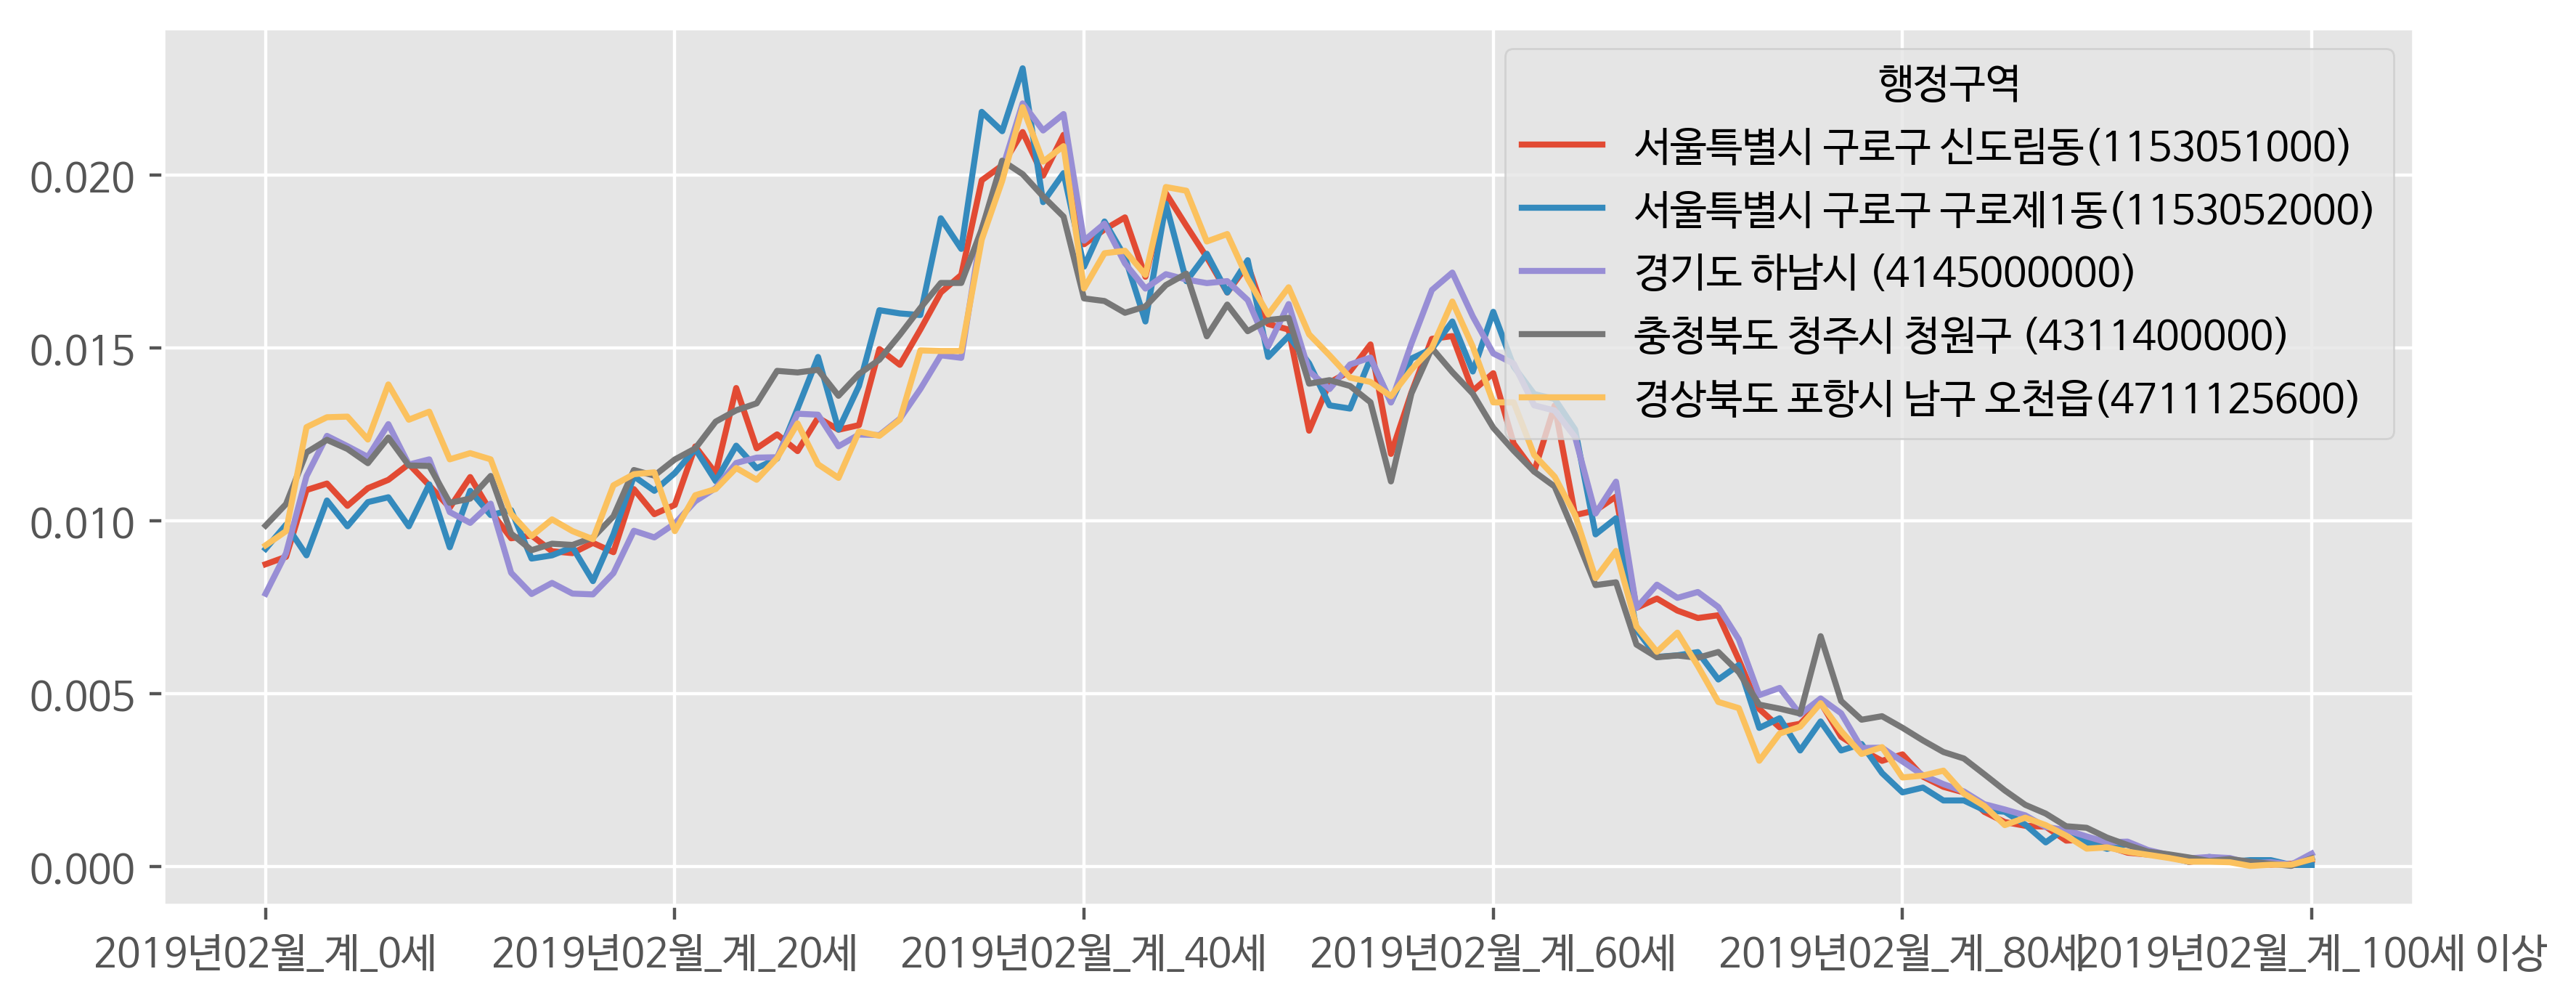

In [ ]:
import numpy as np

df.loc[np.power(df.sub(df2.iloc[0], axis=1),2).sum(axis =1).sort_values().index[:5]].T.plot()
plt.show()

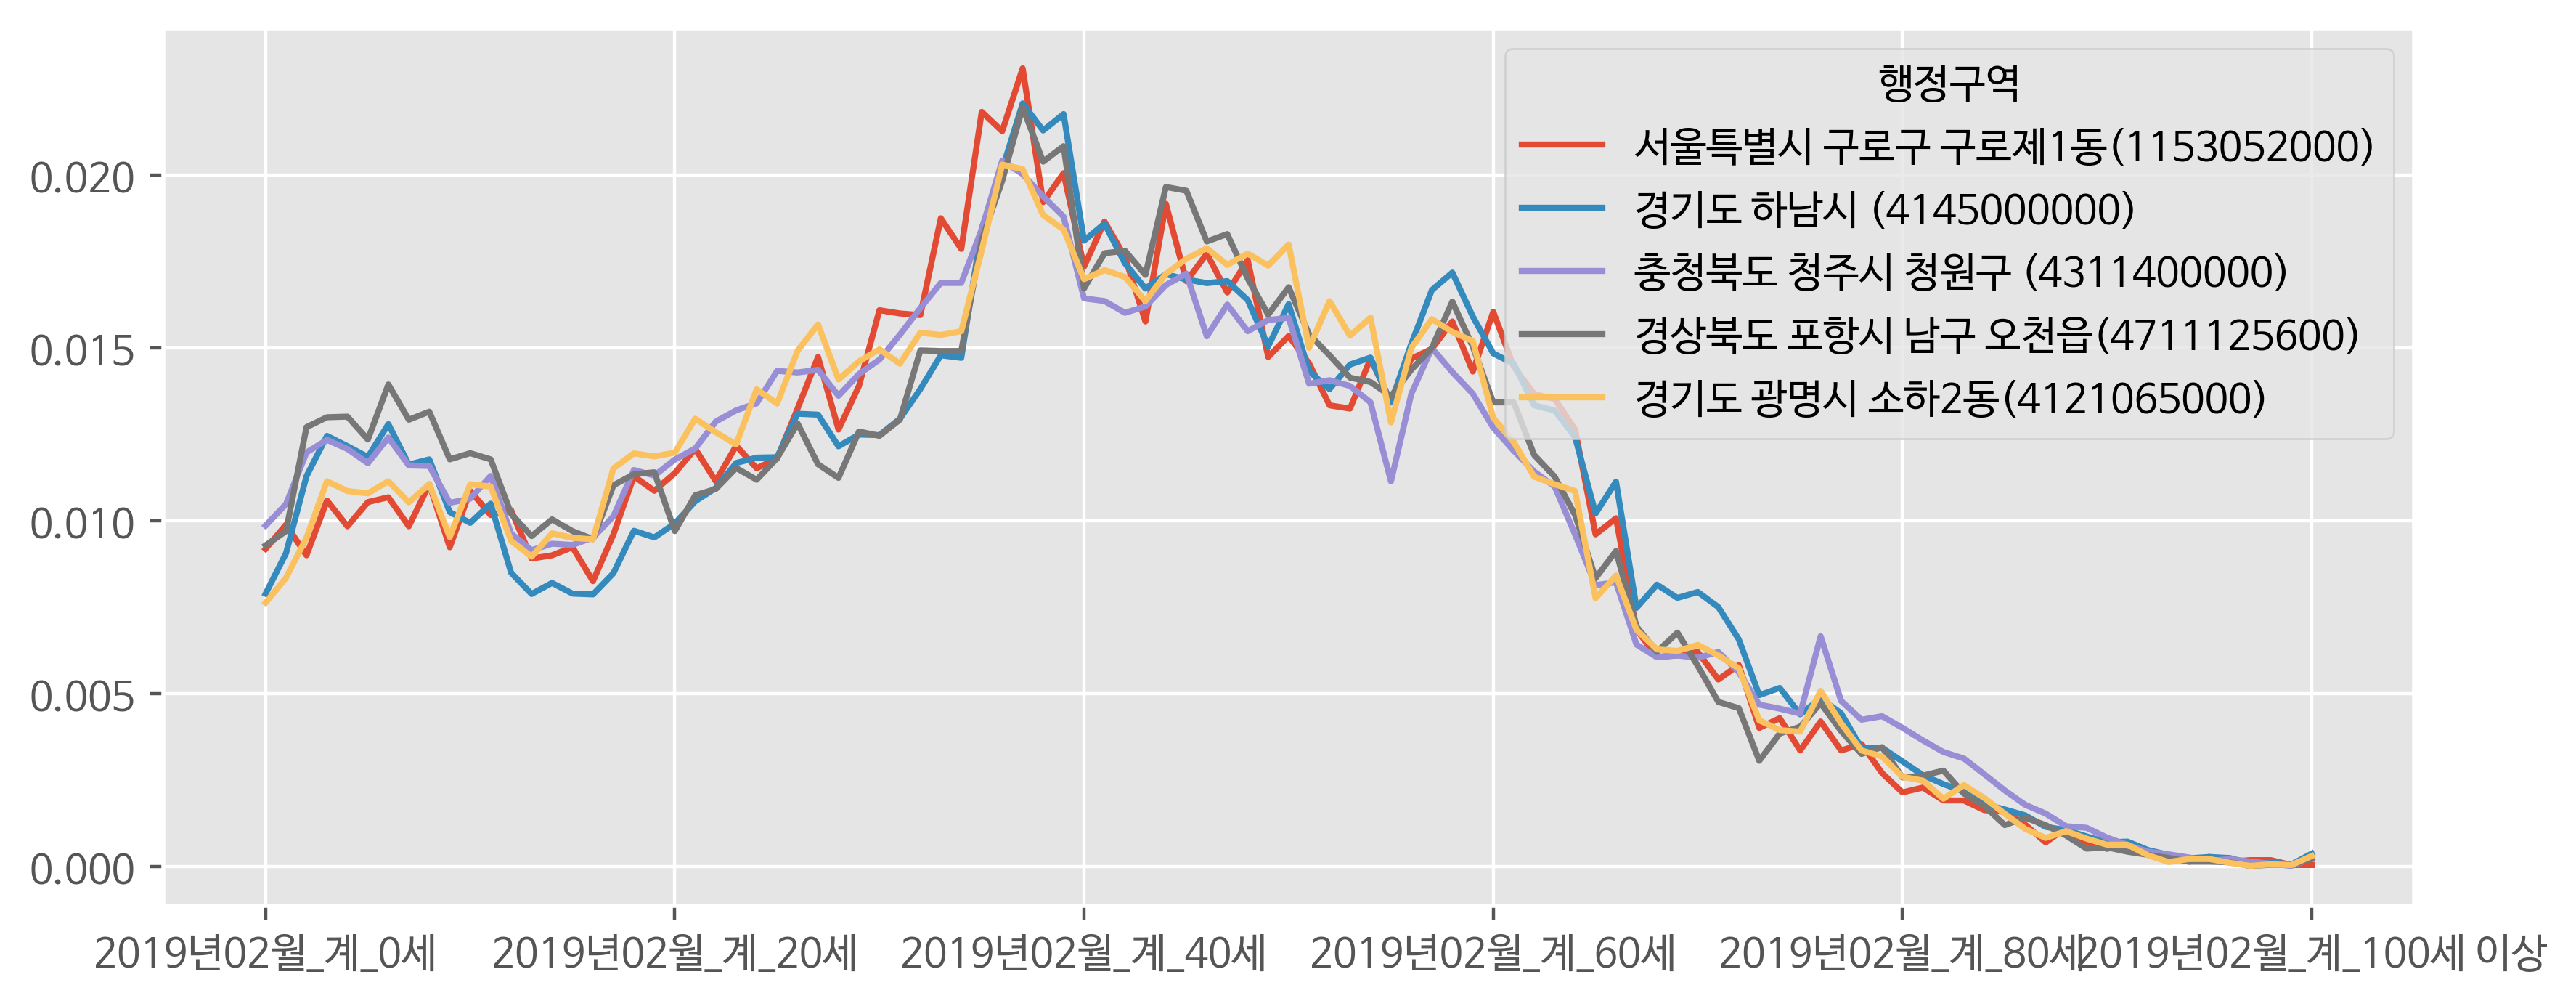

In [ ]:
import numpy as np

# 자기 자신을 제외한 -> 슬라이싱을 통해서 가능
df.loc[np.power(df.sub(df2.iloc[0], axis=1),2).sum(axis =1).sort_values().index[1:6]].T.plot()
plt.show()

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  탄현동


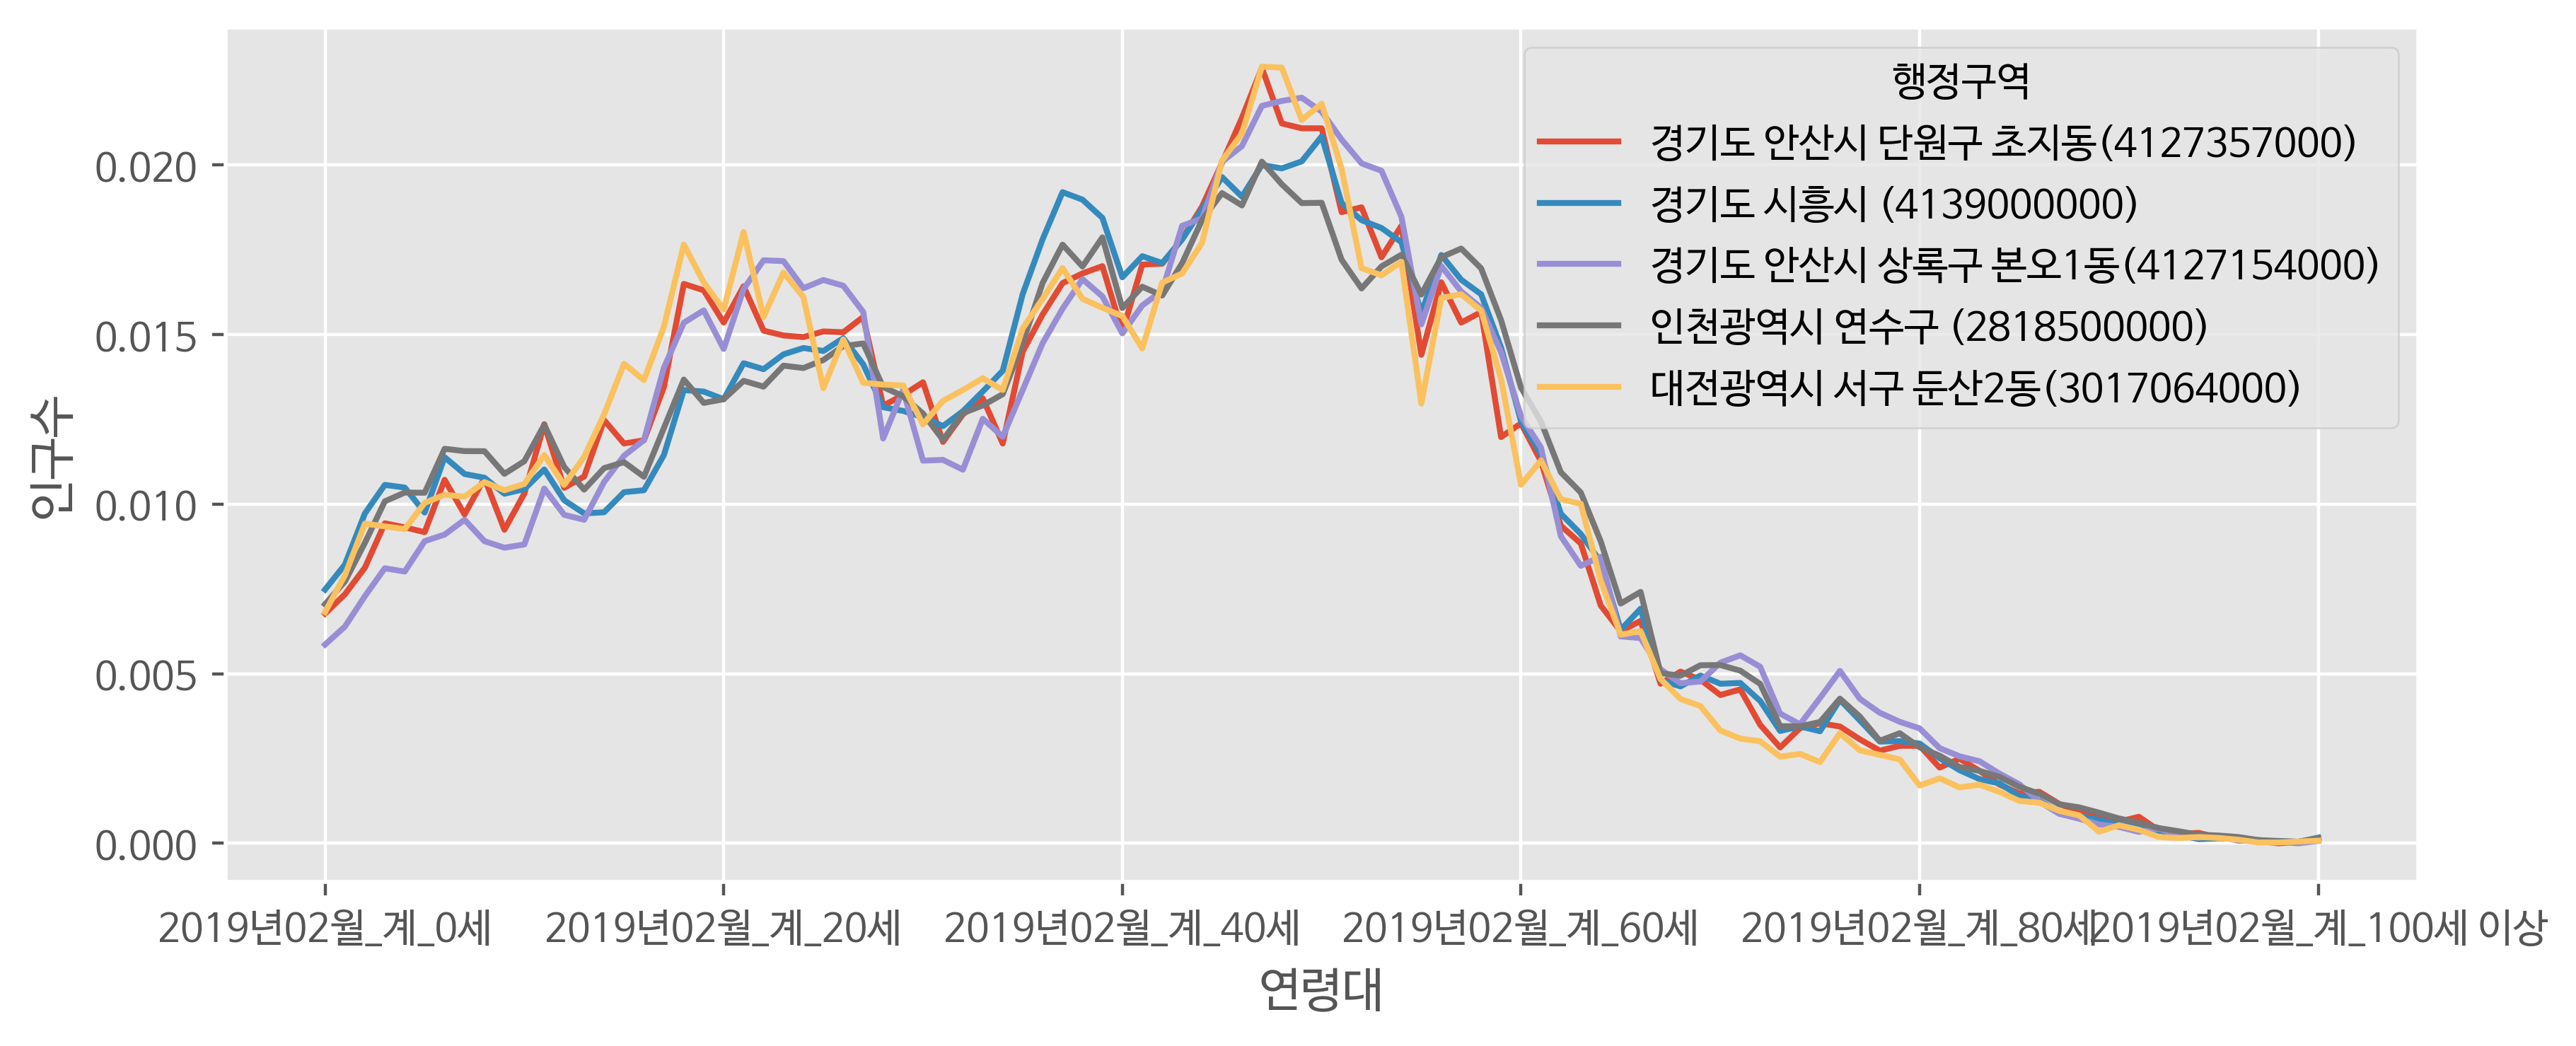

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 가져오기
df = pd.read_csv('/content/age2019_02_noComa_cgName.csv', encoding='cp949', index_col=0)

# 전체 데이터를 총 인구수로 나눠서 비율로 전환
df = df.div(df['총인구수'], axis=0) 

#  필요 없는 컬럼 제거: 총인구수, 연령구간인구수 열삭제
del df['총인구수'], df['연령구간인구수']  

# 지역 이름 입력받기
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')  
a = df.index.str.contains(name) # 3 해당 행의 인덱스를 찾아서 인구구조를 저장

df2 = df[a] # 인구 구조 저장

# 데이터 시각화하기
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
# plt.figure(figsize=(10,4), dpi = 200)
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 200

# 인구 구조가 비슷한 지역 top5(자기 자신을 제외한) 데이터 시각화 하기
df.loc[np.power(df.sub(df2.iloc[0], axis=1),2).sum(axis =1).sort_values().index[1:6]].T.plot()  # T가 행렬을 세로벡터형태로 바꿔서 만들고 그래프 그리기
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.show()